# M2DP descriptors

In [1]:
import time
import open3d as o3d
import numpy as np
from m2dp import M2DP

pcd = o3d.io.read_point_cloud("data/bunny/data/bun000.ply")
print(pcd)
print(np.asarray(pcd.points))
#o3d.visualization.draw_geometries([pcd])


PointCloud with 40256 points.
[[-0.06325    0.0359793  0.0420873]
 [-0.06275    0.0360343  0.0425949]
 [-0.0645     0.0365101  0.0404362]
 ...
 [-0.01575    0.187201  -0.0220209]
 [-0.01525    0.187218  -0.0237782]
 [-0.018      0.18794   -0.0197253]]


In [29]:
def dist(x,y):
    '''
        ||euklidean distance ^2||
    '''
    x = np.asarray(x)
    y = np.asarray(y)
    return np.linalg.norm((x-y)*(x-y))

def M2DP_desc(seg):
    """
        generate pointcloud signature
    """
    des, A1 = M2DP(seg)
    return des

def M2DP_iss_desc(seg):
    """
        generate pointcloud signature from 
        iss simplified pointcloud
    """
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(seg)
    keypoints = o3d.geometry.keypoint.compute_iss_keypoints(pcd)
    
    des, A1 = M2DP(keypoints.points)
    return des

def M2DP_downsample_desc(seg):
    """
        pointcloud signature downsampled to 
        VOXEL_SIZEd voxels
    """
    VOXEL_SIZE = 0.05
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(seg)
    downpcd = pcd.voxel_down_sample(voxel_size=VOXEL_SIZE)
    
    des, A1 = M2DP(downpcd.points)
    return des
    
    

In [30]:
t1 = time.time()
sign1 = M2DP_desc(pcd.points)
t2 = time.time()
t = t2 - t1
print("std M2DP comp time:", t)

t1 = time.time()
sign2 = M2DP_iss_desc(pcd.points)
t2 = time.time()
t = t2 - t1
print("M2DP iss comp time:", t)

t1 = time.time()
sign3 = M2DP_downsample_desc(pcd.points)
t2 = time.time()
t = t2 - t1
print("M2DP down comp time:", t)
print("nonsimilarity to original:")
print("d(iss, orig) = ", dist(sign1, sign2))
print("d(down, orig) =", dist(sign2, sign3))

std M2DP comp time: 0.5471932888031006
M2DP iss comp time: 0.3346989154815674
M2DP down comp time: 0.04989814758300781
nonsimilarity to original:
d(iss, orig) =  0.026946653415593273
d(down, orig) = 0.22974481571173042


In [31]:
# visualisations
#original
o3d.visualization.draw_geometries([pcd])
#iss
keypoints = o3d.geometry.keypoint.compute_iss_keypoints(pcd)
o3d.visualization.draw_geometries([keypoints])
#downsampled
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd])

# Testing object db 
## yolact base
bag playback -r 1.5 \
using M2DP voxel downsample
### Results:
#### TUM static walking

-----OBJECT DB-----\
params used:\
REG_T: 0.05\
MOVE_T 0.5\
0 - BG detected 383 segments\
1 - person detected 286 DYNAMIC segments\
61 - dining table detected 45 segments\
63 - tv detected 64 segments\
57 - chair detected 82 segments\
64 - laptop detected 4 segments\
total registering time: 6.580676555633545\
total descriptors calculation time: 118.17645716667175\
desc. calculation time avg: 0.06123132495682474 max: 0.3370962142944336 min: 0.017235994338989258\
total movements: 879\
movement avg: 0.9988278857806753 max: 2.8075163985524765 min: 0.0068473712018450724 \

-----OBJECT DB-----\
params used:\
REG_T: 0.05\
MOVE_T 0.5\
0 - BG detected 379 segments\
1 - person detected 297 DYNAMIC segments\
61 - dining table detected 45 segments\
63 - tv detected 69 segments\
57 - chair detected 72 segments\
64 - laptop detected 1 segments\
total registering time: 6.447067737579346\
total descriptors calculation time: 121.53844976425171\
desc. calculation time avg: 0.06544881516653296 max: 0.2739872932434082 min: 0.01874828338623047\
total movements: 839\
movement avg: 1.0273790560027478 max: 2.8653341117096964 min: 0.0031317839869058396\



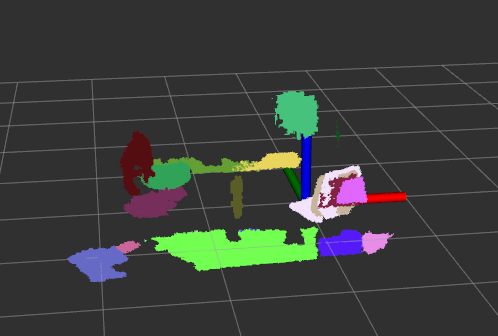

image similar in both runs

### TUM long office household 
(cca 90s)
-----OBJECT DB-----\
params used:\
REG_T: 0.05\
MOVE_T 0.5\
57 - chair detected 152 segments\
0 - BG detected 1330 segments\
61 - dining table detected 406 segments\
74 - book detected 168 segments\
73 - refrigerator detected 175 segments\
40 - bottle detected 166 segments\
46 - bowl detected 15 segments\
76 - vase detected 10 segments\
66 - remote detected 5 segments\
69 - microwave detected 7 segments\
63 - tv detected 54 segments\
33 - sports ball detected 2 segments\
1 - person detected 64 DYNAMIC segments\
78 - teddy bear detected 168 segments\
42 - cup detected 52 segments\
70 - oven detected 29 segments\
59 - potted plant detected 2 segments\
64 - laptop detected 28 segments\
65 - mouse detected 9 segments\
67 - keyboard detected 40 segments\
68 - cell phone detected 4 segments\
48 - apple detected 1 segments\
60 - bed detected 11 segments\
16 - cat detected 2 segments\
27 - handbag detected 2 segments\
45 - spoon detected 1 segments\
77 - scissors detected 1 segments\
total registering time: 56.50657868385315\
total descriptors calculation time: 398.35326957702637\
desc. calculation time avg: 0.06931499383626699 max: 0.4342842102050781 min: 0.01629924774169922
total movements: 2839\
movement avg: 0.9604361098548879 max: 5.20762426008832 min: 0.0034390039626975436\
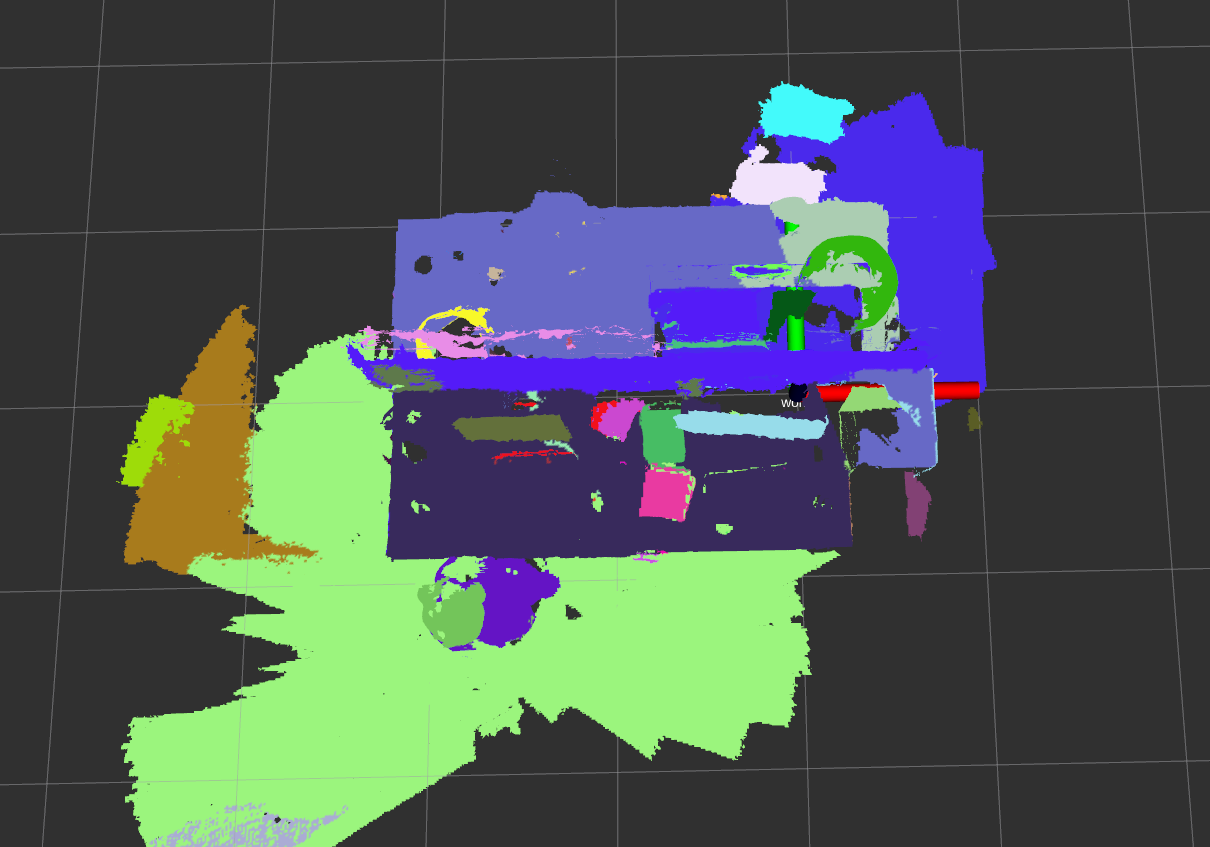


# In-loop testing
## interiornet chair
- t = (0,40s) (obj_db kept running after)
- yolact base
- bag playbag hz min:  average rate: 0.529 1.665s max: 2.386s std dev: 0.20851s
- depth_segmentation/object_segment hz average rate: 17.462 min: 0.000s max: 2.416s std dev: 0.32007s
### std M2DP
-----OBJECT DB-----\
params used:\
REG_T: 0.05 \
MOVE_T 0.5 \
0 - BG detected 17 segments \
57 - chair detected 13 segments \ 
58 - couch detected 3 segments \
60 - bed detected 8 segments \
61 - dining table detected 4 segments \
64 - laptop detected 1 segments \
63 - tv detected 2 segments \
78 - teddy bear detected 1 segments \
26 - umbrella detected 1 segments \
69 - microwave detected 1 segments \
74 - book detected 3 segments \
total registering time: 0.11364626884460449 \
total descriptors calculation time: 91.6038179397583 \
descriptots calc time avg: 0.20221593364185056 max: 1.4444687366485596 min: 0.025850534439086914 \
movement avg: 0.6548276948834845 max: 2.248573331495601 min:  0.007117587409047241 \
### iss M2DP
-----OBJECT DB-----\
params used:\
REG_T: 0.05\
MOVE_T 0.5\
0 - BG detected 175 segments \
57 - chair detected 52 segments \
60 - bed detected 17 segments \
61 - dining table detected 9 segments \
63 - tv detected 12 segments \
64 - laptop detected 5 segments \
58 - couch detected 6 segments \
74 - book detected 4 segments \
78 - teddy bear detected 1 segments \
26 - umbrella detected 2 segments \
69 - microwave detected 1 segments \
total registering time: 0.6497204303741455 \
total descriptors calculation time: 61.79417562484741 \
descriptots calc time avg: 0.11747942134001409 max: 0.6469235420227051 min: 0.03428506851196289 \
movement avg: 0.5481921015932479 max: 2.5776403388896814 min: 0.007117587409047241 \
### vox downsample M2DP
- voxel_size = 0.05

-----OBJECT DB-----\
params used:\
REG_T: 0.05\
MOVE_T 0.5 \
0 - BG detected 121 segments  \
57 - chair detected 37 segments \
60 - bed detected 16 segments \
61 - dining table detected 6 segments \
63 - tv detected 8 segments \
64 - laptop detected 2 segments \
58 - couch detected 5 segments \
74 - book detected 4 segments \
78 - teddy bear detected 1 segments \
26 - umbrella detected 2 segments \
69 - microwave detected 1 segments \
total registering time: 0.5501213073730469 \
total descriptors calculation time: 32.8100688457489 \
desc. calculation time avg: 0.062376556740967495 max: 0.4771299362182617 min: 0.016089677810668945 \
movement avg: 0.3433612118343127 max: 2.4356878998754787 min: 0.007117587409047241 \


## TUM static walking
### std M2DP
- 9.7s
-----OBJECT DB-----
0 - BG detected 23 segments
1 - person detected 31 DYNAMIC segments
61 - dining table detected 7 segments
63 - tv detected 6 segments
57 - chair detected 10 segments
total registering time: 0.44762420654296875
total descriptors calculation time: 142.33595943450928
descriptots calc time avg: 0.12001345652150866 max: 0.8738725185394287 min: 0.022505760192871094
movement avg: 1.0124465760528862 max: 2.9393473735521325 min: 0.007556383418860094

## iss M2DP
- 9.5s
-----OBJECT DB-----
params used:
REG_T: 0.05
MOVE_T 0.5
0 - BG detected 485 segments
1 - person detected 253 DYNAMIC segments
61 - dining table detected 42 segments
63 - tv detected 69 segments
57 - chair detected 80 segments
27 - handbag detected 1 segments
total registering time: 4.827476739883423
total descriptors calculation time: 115.59971070289612
descriptots calc time avg: 0.08989091034439822 max: 0.4446139335632324 min: 0.02853679656982422
movement avg: 0.8020158612487006 max: 2.8998722727491253 min: 0.0076951680092686645

### downsampled M2DP
- 0.05 voxel size
- 9.7s

-----OBJECT DB-----
params used:
REG_T: 0.05
MOVE_T 0.5
0 - BG detected 251 segments
1 - person detected 211 DYNAMIC segments
61 - dining table detected 36 segments
63 - tv detected 39 segments
57 - chair detected 67 segments
total registering time: 2.702631711959839
total descriptors calculation time: 73.73479747772217
descriptots calc time avg: 0.0588466061274718 max: 0.32694172859191895 min: 0.016542673110961914
movement avg: 0.9708437801821845 max: 2.9944039795977013 min: 0.007056711524057027




- yolact m2dp
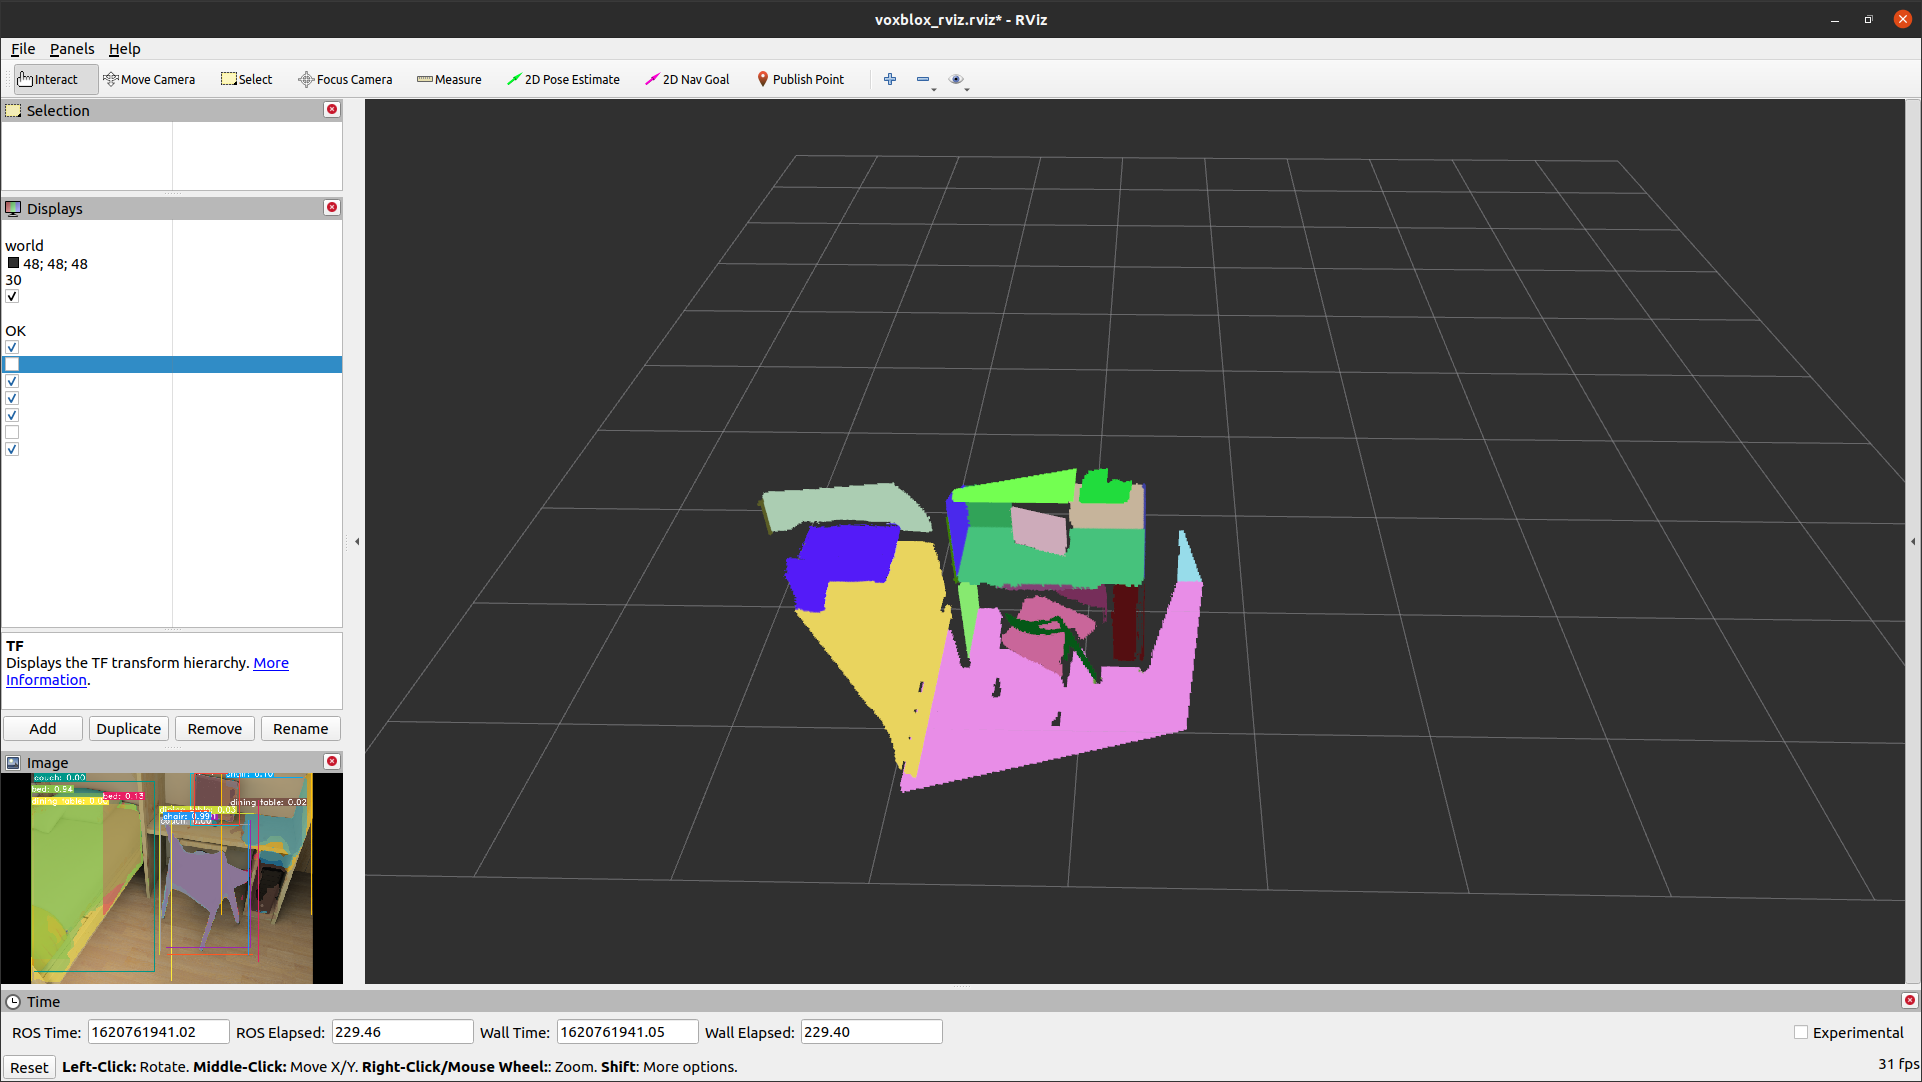
- yolact iss m2dp
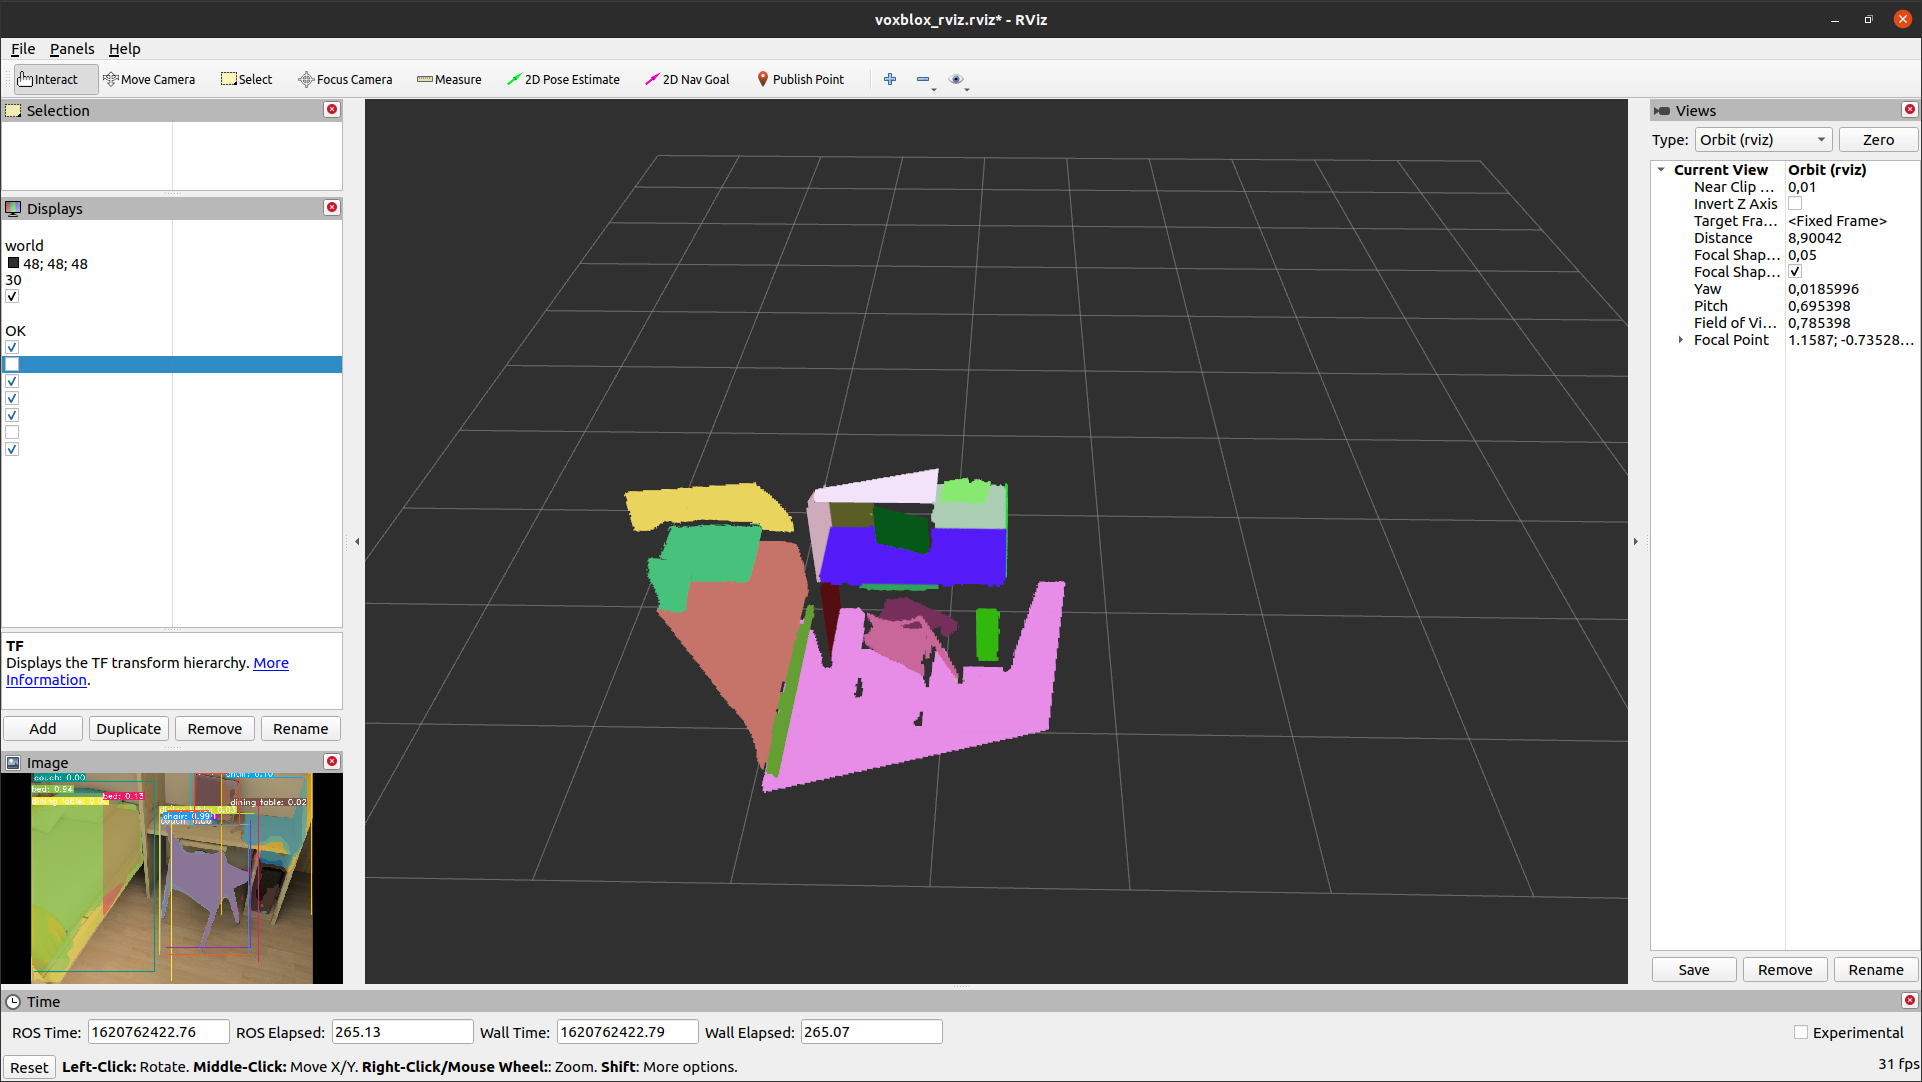
- yolact voxel downsample m2dp
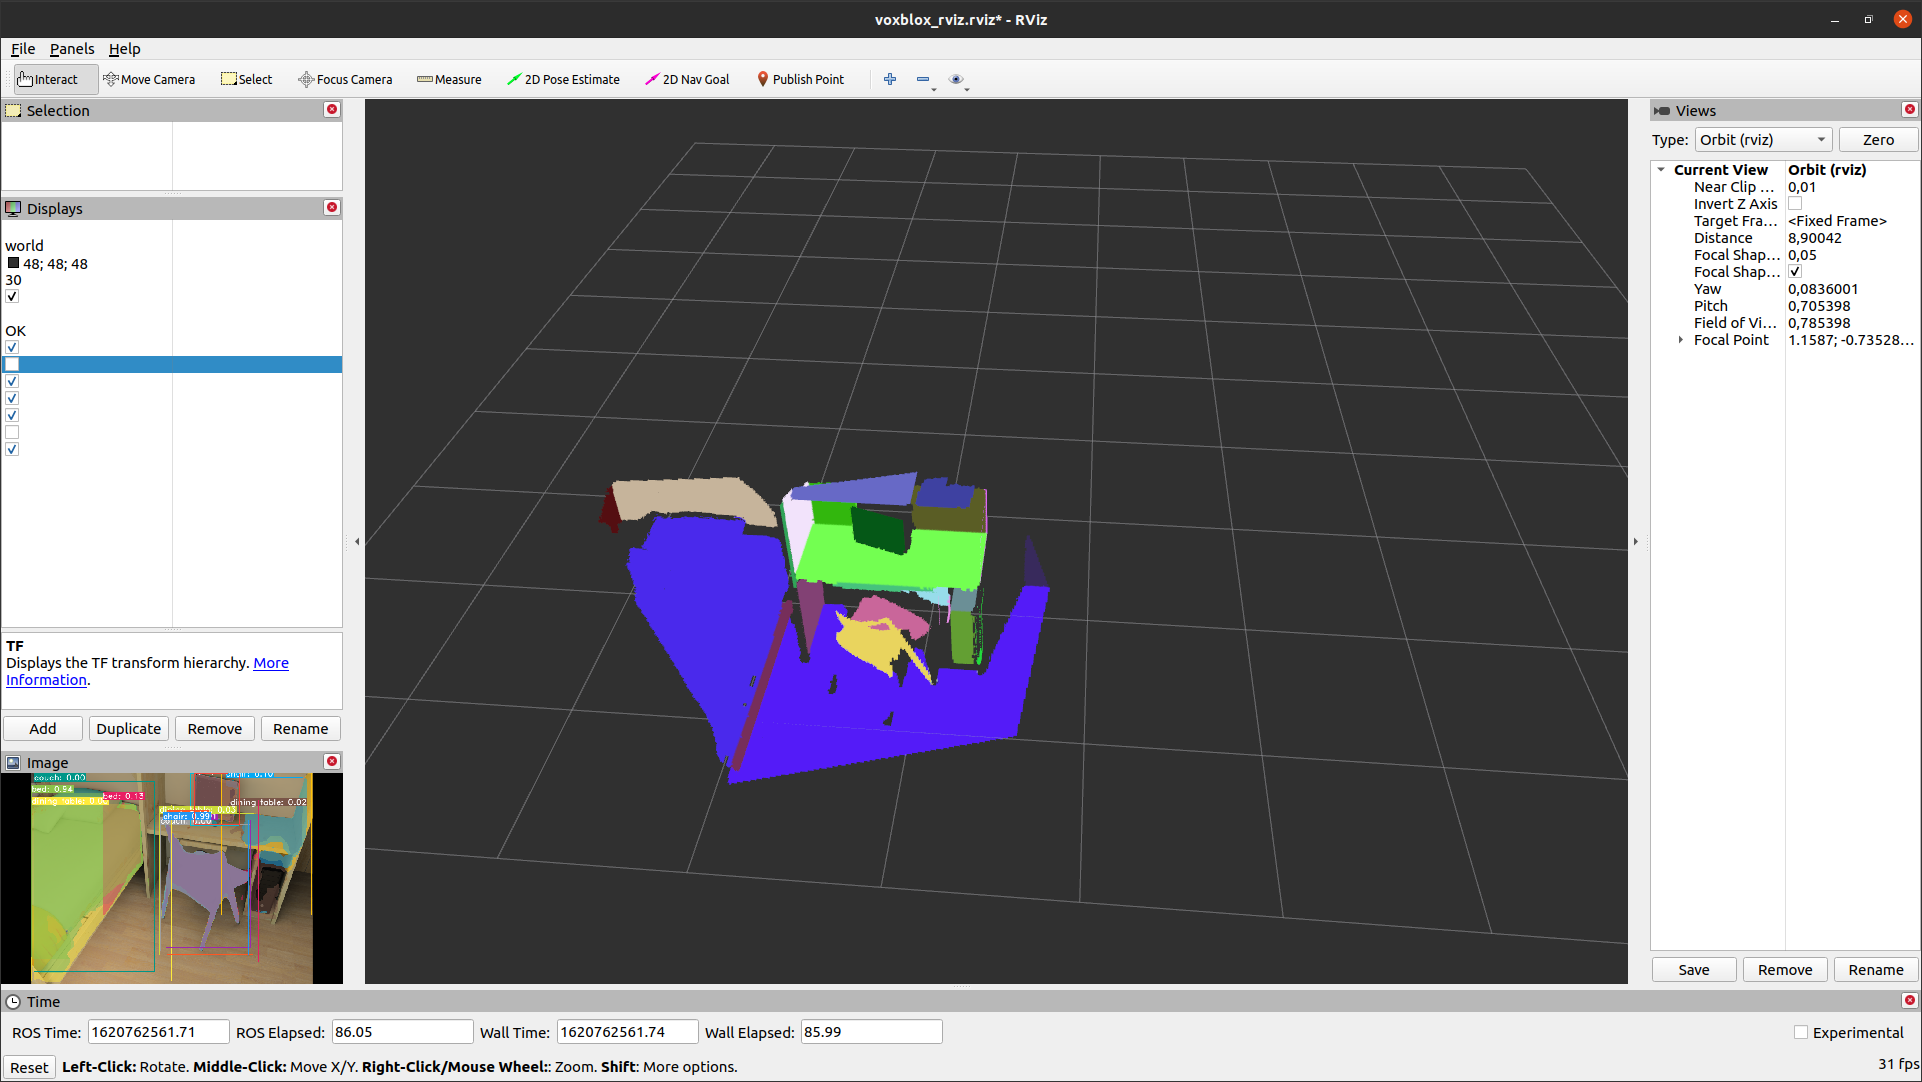